Importing Libraries

In [2]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Models

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

Model Evaluation

In [68]:
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import precision_score , f1_score , recall_score , roc_curve, auc
from sklearn.metrics import RocCurveDisplay

In [5]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Data Exploration

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.shape

(303, 14)

In [12]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


Visualizing and Finding Patterns in Data

In [13]:
#finding out how many of each class is there
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [16]:
#Checking how sex corresponds to the target column
pd.crosstab(df.sex , df.target)

target,0,1
sex,,
0,24,72
1,114,93


<Axes: title={'center': 'How Gender correlates to Heart Disease'}, xlabel='target', ylabel='Count'>

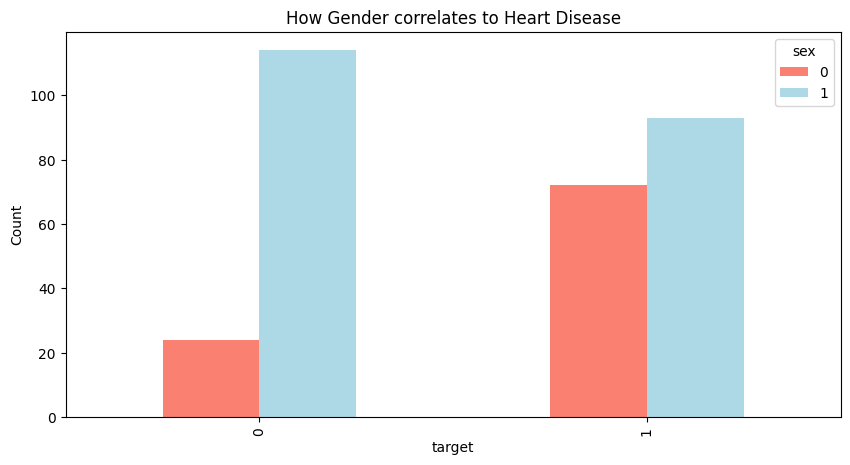

In [20]:
pd.crosstab(df.target , df.sex).plot(kind = "bar", color = ["salmon" , "lightblue"], figsize = (10,5), title = "How Gender correlates to Heart Disease" , ylabel = "Count")


Text(0, 0.5, 'Maximum Heart Rate')

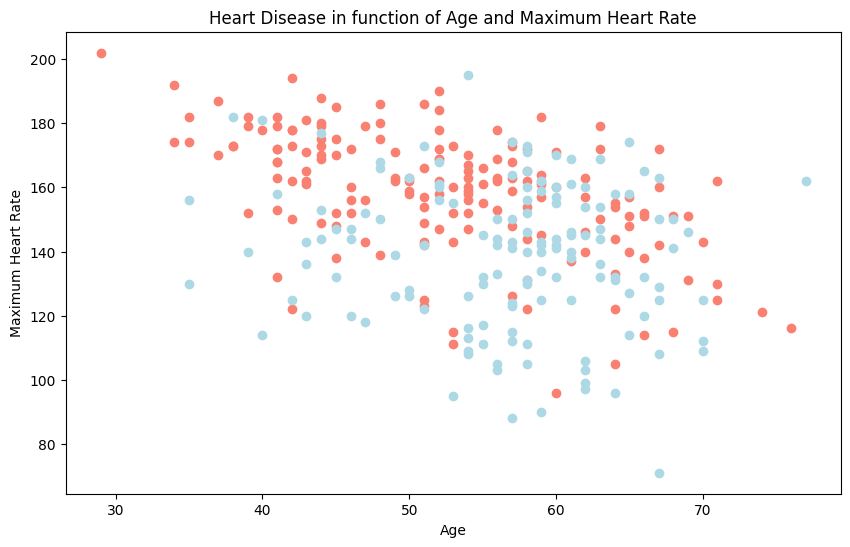

In [21]:
#Comparing Age vs Maximum Heart Rate
plt.figure(figsize = (10,6))

#Using scatter plot to plot age vs maximum heart rate for target = 1
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],
           color = "salmon")
#Using scatter plot to plot age vs maximum heart rate for target = 0
plt.scatter (df.age[df.target == 0], df.thalach[df.target ==0] , color = "lightblue")
plt.title("Heart Disease in function of Age and Maximum Heart Rate")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")

In [22]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


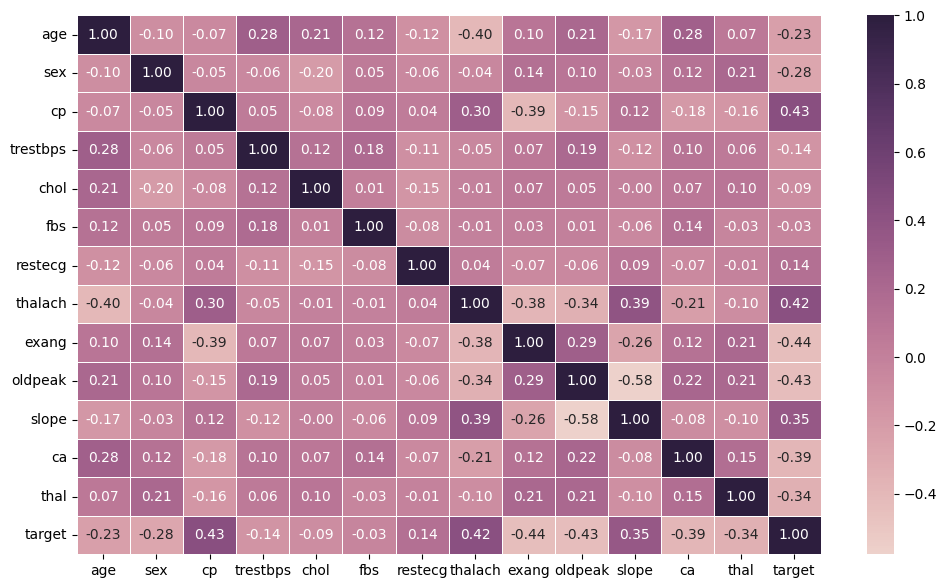

In [23]:
# Visualising Graphically
corr_matrix = df.corr()
fig , ax = plt.subplots(figsize = (12,7))
ax = sns.heatmap(corr_matrix , annot = True , linewidths = 0.5 , fmt = ".2f", cmap = sns.cubehelix_palette(as_cmap=True))

Modelling

In [24]:
#Spliting the dataset
X = df.drop("target" , axis = 1)
y = df["target"]

#setting the random seed
np.random.seed(42)

#Splitting the data
X_train, X_test, y_train , y_test = train_test_split(X,y , test_size = 0.2, stratify = y)

In [25]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [26]:
y_train

19     1
247    0
289    0
288    0
60     1
      ..
39     1
104    1
140    1
114    1
110    1
Name: target, Length: 242, dtype: int64

In [27]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2
114,55,1,1,130,262,0,1,155,0,0.0,2,0,2


Training Models

In [28]:
#creating an empty list to store model scores
model_scores=[]

Logistic Regression

In [29]:
Logistic_clf = LogisticRegression()
Logistic_clf.fit(X_train , y_train)
model_scores.append(Logistic_clf.score(X_test , y_test))
Logistic_clf.score(X_test , y_test)

C:\Users\yugag\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8032786885245902

KNN Classifier

In [31]:
KNN_clf = KNeighborsClassifier(n_neighbors = 4)
KNN_clf.fit(X_train , y_train)

model_scores.append(KNN_clf.score(X_test , y_test))
KNN_clf.score(X_test , y_test)

0.5901639344262295

Random Forest Classifier

In [32]:
RandomForest_clf = RandomForestClassifier(n_estimators = 100)
RandomForest_clf.fit(X_train , y_train )
model_scores.append(RandomForest_clf.score(X_test , y_test))
RandomForest_clf.score(X_test , y_test)


0.8032786885245902

Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=8, random_state=0)
tree.fit(X_train, y_train)

model_scores.append(tree.score(X_test, y_test))
tree.score(X_test, y_test)

0.7213114754098361

Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB  
NaiveBayes_clf = GaussianNB()  
NaiveBayes_clf.fit(X_train, y_train)
model_scores.append(NaiveBayes_clf.score(X_test , y_test))
NaiveBayes_clf.score(X_test, y_test)


0.819672131147541

In [35]:
model_scores

[0.8032786885245902,
 0.5901639344262295,
 0.5901639344262295,
 0.8032786885245902,
 0.7213114754098361,
 0.819672131147541]

In [36]:
train_scores = []
test_scores = []
neighbors = range(1,100)
knn_clf = KNeighborsClassifier()
# Tuning Hyperparameters of KNN 
for i in range(1,100):
    knn_clf.set_params(n_neighbors = i)
    knn_clf.fit(X_train , y_train)
    train_scores.append(knn_clf.score(X_train , y_train))
    test_scores.append(knn_clf.score(X_test, y_test))

In [37]:
train_scores

[1.0,
 0.8057851239669421,
 0.7851239669421488,
 0.7727272727272727,
 0.7520661157024794,
 0.7520661157024794,
 0.7479338842975206,
 0.7355371900826446,
 0.743801652892562,
 0.743801652892562,
 0.7355371900826446,
 0.7355371900826446,
 0.7148760330578512,
 0.7107438016528925,
 0.71900826446281,
 0.7107438016528925,
 0.6983471074380165,
 0.6942148760330579,
 0.6983471074380165,
 0.6983471074380165,
 0.6942148760330579,
 0.6900826446280992,
 0.6983471074380165,
 0.6942148760330579,
 0.7107438016528925,
 0.6859504132231405,
 0.6983471074380165,
 0.6942148760330579,
 0.6942148760330579,
 0.6859504132231405,
 0.6859504132231405,
 0.6776859504132231,
 0.6652892561983471,
 0.6900826446280992,
 0.6818181818181818,
 0.6818181818181818,
 0.6818181818181818,
 0.7024793388429752,
 0.6611570247933884,
 0.6570247933884298,
 0.6652892561983471,
 0.6528925619834711,
 0.6694214876033058,
 0.6694214876033058,
 0.6570247933884298,
 0.6611570247933884,
 0.6570247933884298,
 0.6570247933884298,
 0.67355371

In [38]:
test_scores

[0.5409836065573771,
 0.5409836065573771,
 0.6229508196721312,
 0.5901639344262295,
 0.5901639344262295,
 0.5737704918032787,
 0.639344262295082,
 0.5901639344262295,
 0.5901639344262295,
 0.6065573770491803,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.6065573770491803,
 0.639344262295082,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6557377049180327,
 0.6557377049180327,
 0.639344262295082,
 0.6229508196721312,
 0.6065573770491803,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6065573770491803,
 0.6557377049180327,
 0.6229508196721312,
 0.6229508196721312,
 0.639344262295082,
 0.65573770491803

Text(0, 0.5, 'Model Score')

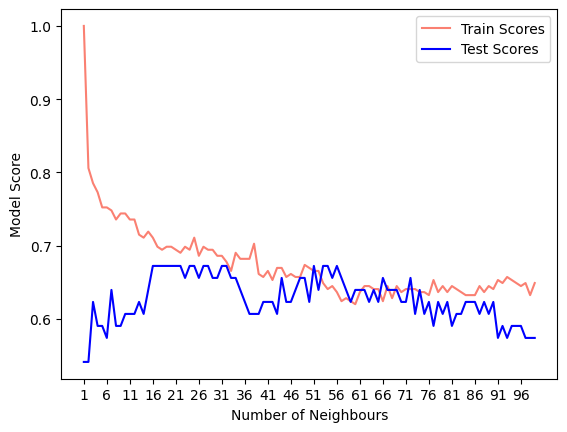

In [39]:
plt.plot(neighbors, train_scores , label  = "Train Scores" , color = "Salmon")
plt.plot(neighbors, test_scores , label  = "Test Scores" , color = "blue")
plt.xticks(np.arange(1, 100 , 5))
plt.legend()
plt.xlabel("Number of Neighbours")
plt.ylabel("Model Score")

Tuning Hyperparameters using Randomized SearchCV

In [41]:
#generating grid space for logistic regression 
log_reg_grid = {"C" : np.logspace(-4,4,20) , 
               "solver" : ["liblinear"]}

#Creating Grid for Random Forest 
rf_grid = {"n_estimators" : np.arange(10,1000 , 50) , 
          "max_depth" : [None, 3 ,5 , 10] ,
          "min_samples_split" : np.arange(1,20,2) ,
          "min_samples_leaf": np.arange(2 ,20, 2)}

In [42]:
#Tune Logistic Regression 
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid ,
                               cv = 5 ,
                               n_iter = 20 ,
                               verbose = True)
#Fitting the model
rs_log_reg.fit(X_train , y_train)
rs_log_reg.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.7868852459016393

In [43]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [44]:
#Tune Logistic Regression 
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions = rf_grid ,
                               cv = 5 ,
                               n_iter = 20 ,
                               verbose = True)
#Fitting the model
rs_rf.fit(X_train , y_train)
rs_rf.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.819672131147541

In [48]:
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 13,
 'min_samples_leaf': 4,
 'max_depth': 10}

In [49]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = RandomizedSearchCV(estimator=GaussianNB(), param_distributions=param_grid_nb, verbose=1, cv=10, n_jobs=-1 , n_iter = 20)

nbModel_grid.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=GaussianNB(), n_iter=20, n_jobs=-1,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-0...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   verbose=1)

In [50]:
nbModel_grid.score(X_test , y_test)

0.819672131147541

In [51]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid ,
                               cv = 5 ,
                               n_iter = 20 ,
                               verbose = True)
#Fitting the model
rs_log_reg.fit(X_train , y_train)
rs_log_reg.score(X_test, y_test) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.7868852459016393

GridSearchCV

In [52]:
#Creating Grid for Logical Regression
log_reg_grid = {"C" : np.logspace(-4 ,4 ,20) ,
               "solver" : ["liblinear"]}
#Creating Grid for Random Forest
rf_grid = {"n_estimators" : np.arange(10 , 1000 , 50), 
           "max_depth" : [None, 3 , 5 ,10] , 
           "min_samples_split" : np.arange(2 ,20 ,2) ,
           "min_samples_leaf" : np.arange(1,20,2)}

In [53]:
#Setup Grid hyper parameter for Logical Regression 
gs_log_Reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid ,
                         cv=5 ,
                         verbose = True)

gs_log_Reg.fit(X_train, y_train)
gs_log_Reg.score(X_test , y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.7868852459016393

In [54]:
gs_log_Reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

Evaluating Models
1. Confusion Matrix
2. Classification Report
3. Precision
4. Recall
5. F1 Score

In [55]:
y_preds = rs_rf.predict(X_test)
y_preds

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [56]:
y_test

179    0
197    0
285    0
194    0
188    0
      ..
14     1
4      1
224    0
202    0
12     1
Name: target, Length: 61, dtype: int64

In [73]:
print(confusion_matrix(y_test, y_preds))

[[18 10]
 [ 1 32]]


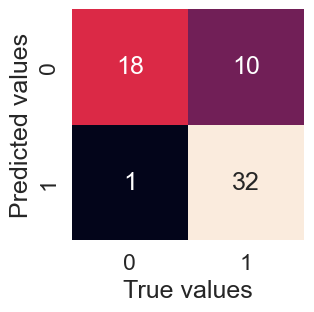

In [74]:
sns.set(font_scale = 1.5)

#Helper Function to plot confusion matrix

def plot_conf_matrix(y_test, y_preds):
    "'Plots a graphical confusion matrix using Seaborn Heatmap'"
    
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds) , annot = True , cbar = False)
    
    plt.xlabel("True values")
    plt.ylabel("Predicted values")
    
plot_conf_matrix(y_test , y_preds)

In [75]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.76      0.97      0.85        33

    accuracy                           0.82        61
   macro avg       0.85      0.81      0.81        61
weighted avg       0.85      0.82      0.81        61



Evaluation of the model using Cross Validation

In [76]:
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 13,
 'min_samples_leaf': 4,
 'max_depth': 10}

In [77]:
classifier = RandomForestClassifier(n_estimators = 710,
                                    min_samples_split = 13,
                                    min_samples_leaf= 4,
                                    max_depth = 10)


In [78]:
clf = LogisticRegression(C = 0.23357214690901212 , solver = "liblinear" )

In [79]:
cv_acc = cross_val_score(classifier , X , y , cv =5 , scoring = "accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.828360655737705

In [80]:
cv_precision = cross_val_score(classifier , X , y , cv =5 , scoring = "precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8312576312576312

In [81]:
cv_recall = cross_val_score(classifier , X , y , cv =5 , scoring = "recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8666666666666666

In [82]:
cv_f1 = cross_val_score(classifier , X , y , cv =5 , scoring = "f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.847657934329973

Important Features

In [83]:
clf.fit(X_train, y_train)


LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [84]:
clf.coef_


array([[ 0.01069193, -0.8148039 ,  0.7987769 , -0.00934758, -0.00674863,
        -0.10775788,  0.30533589,  0.02938368, -0.59307529, -0.4886176 ,
         0.33083335, -0.48037919, -0.75489815]])

In [85]:
feature_dict = dict(zip(df.columns , list(clf.coef_[0])))
feature_dict

{'age': 0.010691931885179591,
 'sex': -0.8148039046917506,
 'cp': 0.7987768991498393,
 'trestbps': -0.009347582993052059,
 'chol': -0.006748633910020272,
 'fbs': -0.10775787830131543,
 'restecg': 0.3053358933877727,
 'thalach': 0.029383684879028083,
 'exang': -0.593075289105812,
 'oldpeak': -0.4886176011783831,
 'slope': 0.33083334898357286,
 'ca': -0.48037918536428265,
 'thal': -0.7548981494136057}

<Axes: title={'center': 'Feature correlation'}>

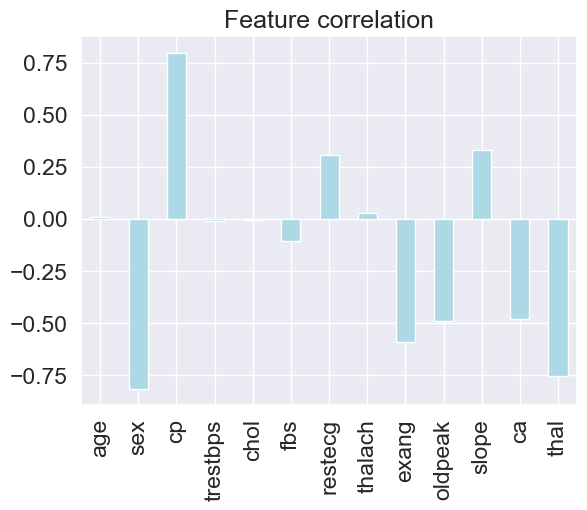

In [86]:
feature_df = pd.DataFrame(feature_dict , index = [0])
feature_df.T.plot.bar(title = "Feature correlation" , legend  = False , color = 'lightblue')